In [13]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.applications import InceptionResNetV2, VGG19
from keras.layers import *
import keras.backend as K

In [14]:
vgg_cl = VGG19()
vgg_cl.trainable = False
vgg_cl.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model_ph = Sequential([
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    Conv2D(64, (3, 3), padding="same", activation="relu", strides=(2, 2)),  # 112 112 64
    Conv2D(256, (3, 3), padding="same", activation="relu"),
    Conv2D(256, (3, 3), padding="same", activation="relu", strides=(2, 2)),  # 56 56 256
    Conv2D(512, (3, 3), padding="same", activation="relu"),
    Conv2D(512, (3, 3), padding="same", activation="relu", strides=(2, 2)),  # 28 28 512
    Conv2D(1024, (3, 3), padding="same", activation="relu"), # 28,28 , 1024
    Conv2D(1024, (3, 3), padding="same", activation="relu", strides=(2, 2)) # 14 14 1024


])
model_out = Sequential([
    Input((14, 14, 1524), 1),
    Conv2D(1024, (3, 3), padding="same", activation="relu"),
    UpSampling2D((2, 2)), # 28,28,1045
    Conv2D(512, (3, 3), padding="same", activation="relu"),
    UpSampling2D((2, 2)),  # 56,56,514
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    UpSampling2D((2, 2)),  # 112 112 128
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    Conv2D(32, (3, 3), padding="same", activation="relu"),
    Conv2D(2, (3, 3), padding="same", activation="tanh"),
    UpSampling2D((2, 2)),  # 224 224
])


In [16]:
inp = Input((224, 224, 1), 1)
inp_for_vgg = concatenate([inp, inp, inp])
out_vgg_cl_ = vgg_cl(inp_for_vgg)  # 1 1000
out_vgg_cl = Dense(980,activation="relu")(out_vgg_cl_)
out_ph_model = model_ph(inp)  # 14 14 1024

concatenate_vgg_zero = concatenate([
    out_vgg_cl for i in range(100)
    # K.constant([[0 for _ in range(176)] for _ in range(out_vgg_cl.shape[0])], dtype=float)
])

concatenate_vgg_re = Reshape((14, 14, 500))(concatenate_vgg_zero)

concatenate_vgg_ph = concatenate([concatenate_vgg_re, out_ph_model])  # 28 28 514

output = model_out(concatenate_vgg_ph)

model = Model(inp, output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(1, 224, 224, 1)]   0           []                               
                                                                                                  
 concatenate_6 (Concatenate)    (1, 224, 224, 3)     0           ['input_10[0][0]',               
                                                                  'input_10[0][0]',               
                                                                  'input_10[0][0]']               
                                                                                                  
 vgg19 (Functional)             (None, 1000)         143667240   ['concatenate_6[0][0]']          
                                                                                            

In [20]:
from data_preparation import *

x, ab, rgb = create_data_imagenet()
x.shape, ab.shape, rgb.shape

((1, 224, 224, 1), (1, 224, 224, 2), (224, 224, 3))

In [18]:
model.compile(optimizer="adam",
              loss='mse',
              metrics=['accuracy'])
epochs = 1
history_a = []
history_l = []
for i in range(epochs):
    print(f"epochs = {i}",end=" ")
    itr = IteratorImages()

    for j in range(14500):
        print(j)
        x,y = next(itr)
        his = model.fit(x, y, epochs=1)
        history_a.append(his.history["accuracy"])
        history_l.append(his.history["loss"])
        if j % 1000 == 0:
            model.save(f"model_{i}_{j}")

epochs = 0 0
1/1 [==============================] - 2s 2s/step - loss: 0.0210 - accuracy: 0.6421


INFO:tensorflow:Assets written to: model_0_0/assets


INFO:tensorflow:Assets written to: model_0_0/assets


1
1/1 [==============================] - 1s 1s/step - loss: 1.0255 - accuracy: 0.4380
2
1/1 [==============================] - 1s 940ms/step - loss: 1.1604 - accuracy: 0.0940
3
1/1 [==============================] - 1s 925ms/step - loss: 0.9985 - accuracy: 0.8791
4
1/1 [==============================] - 1s 934ms/step - loss: 1.0127 - accuracy: 0.1615
5
1/1 [==============================] - 1s 911ms/step - loss: 0.9626 - accuracy: 0.5384
6
1/1 [==============================] - 1s 923ms/step - loss: 1.0232 - accuracy: 0.4550
7
1/1 [==============================] - 1s 984ms/step - loss: 0.9985 - accuracy: 0.8724
8
1/1 [==============================] - 1s 963ms/step - loss: 0.9730 - accuracy: 0.5304
9
1/1 [==============================] - 1s 944ms/step - loss: 0.9323 - accuracy: 0.9040
10
1/1 [==============================] - 1s 972ms/step - loss: 0.9904 - accuracy: 0.7622
11
1/1 [==============================] - 1s 959ms/step - loss: 1.0078 - accuracy: 0.5473
12
1/1 [==============

INFO:tensorflow:Assets written to: model_0_1000/assets


INFO:tensorflow:Assets written to: model_0_1000/assets


1001
1/1 [==============================] - 1s 1s/step - loss: 0.0074 - accuracy: 0.9178
1002
1/1 [==============================] - 1s 1s/step - loss: 0.0026 - accuracy: 0.9405
1003
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - accuracy: 0.2880
1004
1/1 [==============================] - 1s 1s/step - loss: 0.0147 - accuracy: 0.3541
1005
1/1 [==============================] - 1s 986ms/step - loss: 0.0026 - accuracy: 0.9397
1006
1/1 [==============================] - 1s 1s/step - loss: 0.0072 - accuracy: 0.9171
1007
1/1 [==============================] - 1s 1s/step - loss: 0.0024 - accuracy: 0.6392
1008
1/1 [==============================] - 1s 1s/step - loss: 0.0024 - accuracy: 0.6393
1009
1/1 [==============================] - 1s 978ms/step - loss: 0.0025 - accuracy: 0.4120
1010
1/1 [==============================] - 1s 1s/step - loss: 0.0065 - accuracy: 0.8932
1011
1/1 [==============================] - 1s 994ms/step - loss: 0.0027 - accuracy: 0.9402
1012
1/1 [==

INFO:tensorflow:Assets written to: model_0_2000/assets


INFO:tensorflow:Assets written to: model_0_2000/assets


2001
1/1 [==============================] - 1s 1s/step - loss: 0.0043 - accuracy: 0.8002
2002
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - accuracy: 0.6445
2003
1/1 [==============================] - 1s 994ms/step - loss: 0.0031 - accuracy: 0.8250
2004
1/1 [==============================] - 1s 1s/step - loss: 0.0061 - accuracy: 0.5318
2005
1/1 [==============================] - 1s 1s/step - loss: 0.0122 - accuracy: 0.4555
2006
1/1 [==============================] - 2s 2s/step - loss: 0.0047 - accuracy: 0.9035
2007
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - accuracy: 0.1869
2008
1/1 [==============================] - 1s 1s/step - loss: 0.0030 - accuracy: 0.5469
2009
1/1 [==============================] - 1s 1s/step - loss: 0.0030 - accuracy: 0.5495
2010
1/1 [==============================] - 1s 1s/step - loss: 0.0061 - accuracy: 0.5676
2011
1/1 [==============================] - 1s 1s/step - loss: 0.0061 - accuracy: 0.5683
2012
1/1 [========

INFO:tensorflow:Assets written to: model_0_3000/assets


INFO:tensorflow:Assets written to: model_0_3000/assets


3001
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - accuracy: 0.9272
3002
1/1 [==============================] - 2s 2s/step - loss: 0.0016 - accuracy: 0.7781
3003
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - accuracy: 0.7918
3004
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - accuracy: 0.8054
3005
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - accuracy: 0.7681
3006
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - accuracy: 0.7768
3007
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - accuracy: 0.7761
3008
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - accuracy: 0.7667
3009
1/1 [==============================] - 1s 1s/step - loss: 0.0055 - accuracy: 0.5977
3010
1/1 [==============================] - 1s 994ms/step - loss: 0.0036 - accuracy: 0.8541
3011
1/1 [==============================] - 1s 1s/step - loss: 0.0052 - accuracy: 0.6139
3012
1/1 [========

INFO:tensorflow:Assets written to: model_0_4000/assets


INFO:tensorflow:Assets written to: model_0_4000/assets


4001
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - accuracy: 0.8513
4002
1/1 [==============================] - 1s 1s/step - loss: 0.0019 - accuracy: 0.7200
4003
1/1 [==============================] - 2s 2s/step - loss: 0.0032 - accuracy: 0.8824
4004
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - accuracy: 0.8903
4005
1/1 [==============================] - 1s 1s/step - loss: 5.4765e-04 - accuracy: 0.7550
4006
1/1 [==============================] - 1s 1s/step - loss: 4.5370e-04 - accuracy: 0.5052
4007
1/1 [==============================] - 1s 1s/step - loss: 0.0033 - accuracy: 0.8969
4008
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - accuracy: 0.8846
4009
1/1 [==============================] - 1s 1s/step - loss: 0.0037 - accuracy: 0.9314
4010
1/1 [==============================] - 1s 1s/step - loss: 4.2677e-04 - accuracy: 0.9694
4011
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - accuracy: 0.7587
4012
1/1 

KeyboardInterrupt: 

0


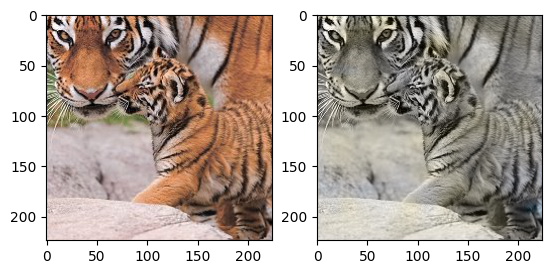

In [21]:
a = model(x)
res = lab_ab_in_rgb(x, a)
rgb = np.array(rgb, dtype=int)
plt.subplot(1, 2, 1)
print(np.min(rgb))
plt.imshow(rgb)

plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

In [ ]:
avg_img = avg_photo(rgb)
x2, ab2 = grey_in_lab(avg_img.astype(int))